# Tensorflow Advanced by Aditya

## The architecture

* The data in a tnesor is stored in a graph which contains the information about data and pre-planned execution/operations.

* Direct operations were not allowed in TF 1.x , but from 2.x onwwards direct operations on Tensors are allowed , which is called the eager execution.

* For executing operations we used sessions in TF 1.x , which will manage resource allocation , Life cycle management , parallel execution and variable persistence.

In [1]:
%tensorflow_version 2.x

import tensorflow as tf

print(tf.version)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [2]:
import tensorflow as tf

# Direct addition with eager execution (TensorFlow 2.x)
tf.config.run_functions_eagerly(True)

a = tf.constant(2.0)
b = tf.constant(3.0)
c = a + b  # Direct addition, executed immediately

print("Result:", c)  # Outputs: Result: 5.0


Result: tf.Tensor(5.0, shape=(), dtype=float32)


In [3]:
print('For better representation you can use c.numpy() and here is the outpu :-' , c.numpy())

For better representation you can use c.numpy() and here is the outpu :- 5.0


In [4]:
# Using the session :-

# with tf.Session() as sess:
#     result = sess.run(c)
#     print("Result:", result)


# this code will throw error as the session() is removed from version 2.x

## Types of tensors :-


1.   0D tensor :- also known as scalar tensor, this supports only one constant value in it.
2.   1D Tensor :- This tensor stores a 1D array
* Similarly we can extend these types upto nD vectors. There was one type , named as placeholder , but is depriciated with 2.x update , so we can ignore that.



In [5]:
import tensorflow as tf

# Creating tensors
a = tf.constant([1, 2, 3])
b = tf.constant([4, 5, 6])

# Addition
addition_result = tf.add(a, b)
print("Addition Result:", addition_result.numpy())

# Element-wise multiplication
elementwise_mul_result = tf.multiply(a, b)
print("Element-wise Multiplication Result:", elementwise_mul_result.numpy())

# Matrix multiplication
matrix_a = tf.constant([[1, 2], [3, 4]])
matrix_b = tf.constant([[5, 6], [7, 8]])
matrix_mul_result = tf.matmul(matrix_a, matrix_b)
print("Matrix Multiplication Result:")
print(matrix_mul_result.numpy())


Addition Result: [5 7 9]
Element-wise Multiplication Result: [ 4 10 18]
Matrix Multiplication Result:
[[19 22]
 [43 50]]


## Creating a bit more customizable neural network using tensorflow


In [6]:
import tensorflow as tf
import numpy as np

# XOR input and output
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_train = np.array([[0], [1], [1], [0]], dtype=np.float32)

# Convert data to TensorFlow tensors
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)

# Define hyperparameters
learning_rate = 0.1
epochs = 10000
hidden_units = 2

# Define weights and biases
weights_hidden = tf.Variable(tf.random.normal([2, hidden_units], stddev=0.1))
bias_hidden = tf.Variable(tf.zeros([hidden_units]))

weights_output = tf.Variable(tf.random.normal([hidden_units, 1], stddev=0.1))
bias_output = tf.Variable(tf.zeros([1]))

# Define the neural network
def neural_network(x):
    # Hidden layer
    hidden_layer = tf.nn.sigmoid(tf.matmul(x, weights_hidden) + bias_hidden)
    # Output layer
    output_layer = tf.nn.sigmoid(tf.matmul(hidden_layer, weights_output) + bias_output)
    return output_layer

# Define the loss function (binary crossentropy)
def loss(y_true, y_pred):
    return tf.reduce_mean(tf.keras.losses.binary_crossentropy(y_true, y_pred))

# Define the optimizer
optimizer = tf.optimizers.SGD(learning_rate)

# Training loop
for epoch in range(epochs):
    # Forward pass
    with tf.GradientTape() as tape:
        predictions = neural_network(X_train_tensor)
        current_loss = loss(y_train_tensor, predictions)

    # Backward pass
    gradients = tape.gradient(current_loss, [weights_hidden, bias_hidden, weights_output, bias_output])
    optimizer.apply_gradients(zip(gradients, [weights_hidden, bias_hidden, weights_output, bias_output]))

    # Print the loss every 1000 epochs
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch {epoch + 1}/{epochs}, Loss: {current_loss.numpy()}')

# Make predictions on XOR inputs
predictions = neural_network(X_train_tensor)

print("\nPredictions on XOR inputs:")
print(predictions.numpy())


Epoch 1000/10000, Loss: 0.6931488513946533
Epoch 2000/10000, Loss: 0.6931446194648743
Epoch 3000/10000, Loss: 0.6931400299072266
Epoch 4000/10000, Loss: 0.6931347846984863
Epoch 5000/10000, Loss: 0.6931276321411133
Epoch 6000/10000, Loss: 0.6931168437004089
Epoch 7000/10000, Loss: 0.6930987238883972
Epoch 8000/10000, Loss: 0.6930642127990723
Epoch 9000/10000, Loss: 0.6929855346679688
Epoch 10000/10000, Loss: 0.6927503943443298

Predictions on XOR inputs:
[[0.49445358]
 [0.5000885 ]
 [0.5013217 ]
 [0.5060929 ]]


## Mathematics behind binary cross-entropy:

Binary cross-entropy measures the difference between the true labels and the predicted probabilities in a binary classification problem. For each individual sample:

If the true label is 0 (negative class) and the predicted probability is p (between 0 and 1), the cross-entropy is calculated as: -log(1 - p)
If the true label is 1 (positive class) and the predicted probability is p, the cross-entropy is: -log(p)
The negative log ensures that predictions closer to the true label (i.e., p close to 1 for positive class and p close to 0 for negative class) will result in lower loss values.

# Introduction to keras API

**Keras is a high-level, user-friendly API written in Python that makes building and training deep learning models much easier.**

### **Understanding Backends:**

Imagine backends like TensorFlow, PyTorch, or CNTK as the engines of deep learning computations. They handle the heavy lifting of numerical operations, memory management, and hardware acceleration.

Think of backends as low-level libraries written in C or C++ for maximum performance.

###**Keras as the User-Friendly Facade:**

Keras sits on top of these backends like a high-level API. It doesn't implement the core algorithms itself, but provides an intuitive interface for users to interact with them.

Instead of writing low-level code specific to each backend, you can use Keras's Pythonic syntax to define your model architecture, select layers, and configure training parameters.

### **Analogy: Building a House:**

Think of constructing a house. The concrete, bricks, and wood (represented by the backend) are essential building materials.

But you wouldn't directly handle individual bricks or complex construction techniques. That's where an architect (like Keras) comes in.

The architect provides blueprints, specifies layouts, and chooses materials (layers) without getting into the nitty-gritty of every brick or beam.

## **Understanding Keras usability**

**Ease of Use:** Keras excels in simplifying deep learning with intuitive APIs and minimal boilerplate code, making it ideal for both beginners and advanced users.

**Efficiency:** It leverages powerful backends like TensorFlow, Theano, or CNTK for efficient computation on CPUs, GPUs, and TPUs.

**Flexibility:** Offers extensive layer types, optimization algorithms, and loss functions to address diverse neural network architectures and learning tasks.

**Extensibility:** Seamlessly integrates with other scientific Python libraries like NumPy, SciPy, and Matplotlib for data manipulation and visualization.

**Active Community:** Keras benefits from a large and supportive community that contributes tutorials, code examples, and discussions.

### **Key Concepts:**

**Modules:** Keras provides core modules for model building (models), layer construction (layers), optimization (optimizers), evaluation (metrics), and datasets (datasets).

**Models:** Represent deep learning architectures, comprising sequential or functional layers.

**Layers:** Building blocks of models, performing specific operations on data (dense layers for linear transformations, convolutional layers for image processing, etc.).

**Losses and Metrics:** Quantify model performance during training and evaluation (e.g., mean squared error for regression, categorical cross-entropy for classification).

**Optimizers:** Guide the model's learning by updating weights according to a chosen algorithm (e.g., Adam, SGD).

-------------

## Models in keras



*   Represent the overall deep learning architecture you're building.


Keras offers two primary APIs for model construction :


### 1. **Sequential API** :-
The Sequential API in Keras is a high-level interface for constructing simple, linear deep learning models. It's particularly suitable for scenarios where your model stacks layers consecutively, following a clear input-to-output flow.

**Key Characteristics:**


*   **Ease of Use:** The Sequential API offers a straightforward syntax, allowing you to quickly define models layer by layer with minimal code.
*   **Structure**: Models built with the Sequential API consist of a linear sequence of layers, where the output of one layer becomes the input of the next.
*   **Limitations**: Due to its sequential nature, it's primarily used for models that don't require branching, merging, or multiple inputs/outputs.



In [29]:
from tensorflow.keras import Sequential, layers


In [34]:
#Create a Sequential Model
model = Sequential()

In [35]:
#Add Layers:

#Use the add() method to consecutively add layers to your model

model.add(layers.Dense(5, activation='relu', input_shape=(2,)))  # Input layer with 2 features
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer with 1 neuron and sigmoid activation for binary classification

**Dense(units, activation):** Creates a fully connected layer with units neurons and the specified activation function.

**input_shape:** Only required for the first layer, specifying the data's input shape (e.g., (28, 28, 1) for 28x28 grayscale images).


In [36]:
#Compile the Model

#Define the optimizer, loss function, and metrics to guide the training process

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
from sklearn.model_selection import train_test_split

#Train and Evaluate the Model
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train, epochs=100)
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)


Epoch 1/100
1/1 [==============================] - 0s 39ms/step - loss: 0.4216 - accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 0.4210 - accuracy: 0.6667
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 0.4203 - accuracy: 0.6667
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 0.4196 - accuracy: 0.6667
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 0.4190 - accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 0.4183 - accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 0.4177 - accuracy: 1.0000
Epoch 8/100
1/1 [==============================] - 0s 24ms/step - loss: 0.4170 - accuracy: 1.0000
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 0.4163 - accuracy: 1.0000
Epoch 10/100
1/1 [==============================] - 0s 21ms/step - loss: 0.4157 - accuracy: 1.0000
Epoch 11/100
1/1 [=

### 2. Functional APIs

The Keras functional API offers a flexible way to define neural network architectures beyond the limitations of the sequential API

*   **Multiple inputs** and outputs: This is useful for tasks like multi-modal data processing or generating multiple predictions simultaneously.
*   **Shared layers:** Reuse of layers across different branches of the model improves efficiency and promotes information sharing.
*   **Non-linear topologies:** Design models with complex, directed acyclic graphs (DAGs) to represent intricate relationships between data and predictions.



## Code examples for functional APIs

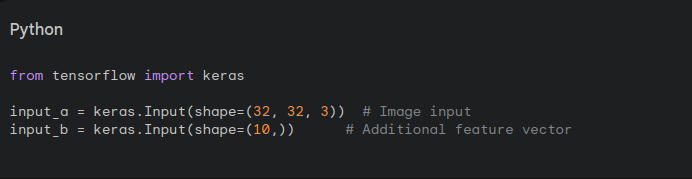
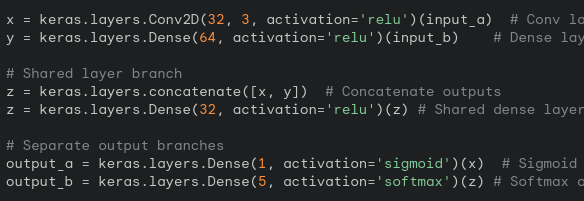

Each line defines a layer and connects it to the previous one(s). We use:

**Conv2D:** Convolutional layer for the image input.

**Dense:** Dense layer for the feature vector and shared branch.

**concatenate:** Combines outputs from image and feature branches.

**Dense:** Separate dense layers for each output branch.

```

model = keras.Model(inputs=[input_a, input_b], outputs=[output_a, output_b])

model.compile(loss=['binary_crossentropy', 'categorical_crossentropy'], optimizer='adam')
```

#Layers

**1. Core Layers:**

- **Dense:** Fully connected layer, performing linear transformations on its inputs.

```python
from tensorflow.keras.layers import Dense

input_layer = keras.Input(shape=(10,))
hidden_layer = Dense(64, activation='relu')(input_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer)
```

- **Activation:** Applies a non-linear function to the output of a layer. Common activations include:
    - ReLU: `activation='relu'`
    - Sigmoid: `activation='sigmoid'`
    - Tanh: `activation='tanh'`

```python
# ReLU example
relu_layer = Dense(64, activation='relu')(input_layer)

# Sigmoid example
sigmoid_layer = Dense(1, activation='sigmoid')(hidden_layer)
```

- **Flatten:** Reshapes the input into a single 1D vector.

```python
from tensorflow.keras.layers import Flatten

image_input = keras.Input(shape=(28, 28, 1))
flattened_image = Flatten()(image_input)
```

**2. Convolutional Layers (for image/3D data):**

- **Conv2D/Conv3D:** Applies filters to extract features from spatial data.

```python
from tensorflow.keras.layers import Conv2D, Conv3D

image_input = keras.Input(shape=(28, 28, 1))
conv_layer = Conv2D(32, kernel_size=(3, 3), activation='relu')(image_input)

# 3D example for video data
volume_input = keras.Input(shape=(16, 16, 16, 1))
conv_layer = Conv3D(16, kernel_size=(3, 3, 3), activation='relu')(volume_input)
```

- **MaxPooling/AveragePooling:** Reduces the dimensionality of spatial data.

```python
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D

conv_layer = Conv2D(32, kernel_size=(3, 3), activation='relu')(image_input)
max_pool = MaxPooling2D(pool_size=(2, 2))(conv_layer)

# Average pooling example
avg_pool = AveragePooling2D(pool_size=(2, 2))(conv_layer)
```

**3. Recurrent Layers (for sequential data):**

- **LSTM (Long Short-Term memory):** Processes sequential data like text or time series.

```python
from tensorflow.keras.layers import LSTM

text_input = keras.Input(shape=(max_length, vocab_size))
lstm_layer = LSTM(64)(text_input)
```

- **GRU (Gated Recurrent Unit):** Similar to LSTM but with simpler architecture.

```python
from tensorflow.keras.layers import GRU

lstm_layer = GRU(64)(text_input)
```

**4. Normalization Layers:**

- **BatchNormalization:** Improves convergence and reduces internal covariate shift.

```python
from tensorflow.keras.layers import BatchNormalization

conv_layer = Conv2D(32, kernel_size=(3, 3), activation='relu')(image_input)
bn_layer = BatchNormalization()(conv_layer)
```

- **LayerNormalization:** Normalizes across features within each sample.

```python
from tensorflow.keras.layers import LayerNormalization

bn_layer = LayerNormalization()(conv_layer)
```

**5. Other Layers:**

- **Dropout:** Randomly drops units during training to prevent overfitting.

```python
from tensorflow.keras.layers import Dropout

hidden_layer = Dense(64, activation='relu')(input_layer)
dropout_layer = Dropout(0.2)(hidden_layer)
```

- **Embedding:** Converts categorical data into dense representations.

```python
from tensorflow.keras.layers import Embedding

text_input = keras.Input(shape=(max_length,))
embedding_layer = Embedding(vocab_size, embedding_dim)(text_input)
```

These are just a few examples, and Keras offers many more specialized layers. Remember to choose the appropriate layers based on your data type, task, and desired model architecture.


## Optimizers

## Optimizers in Keras: Guiding Your Neural Network's Journey

In the realm of training neural networks, **optimizers** play a crucial role in adjusting the network's internal parameters (weights and biases) to minimize the loss function and improve performance. Imagine navigating a maze; the optimizer helps you find the quickest path to the exit (minimum loss) by learning from previous steps.

Keras provides a diverse selection of optimizers, each with its own strengths and weaknesses. Let's explore some of the most common ones:

**1. Stochastic Gradient Descent (SGD):**

* **Concept:** Takes small steps in the direction of the negative gradient, updating parameters individually.
* **Code example:**

```python
from tensorflow.keras.optimizers import SGD

optimizer = SGD(learning_rate=0.01, momentum=0.9)
```

* **Parameters:**
    - `learning_rate`: Controls the step size for updates.
    - `momentum`: Incorporates past gradients for smoother updates.

**2. Adam:**

* **Concept:** Adaptive moment estimation, combines the benefits of SGD and momentum with additional adjustments based on previous gradients' magnitudes.
* **Code example:**

```python
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
```

* **Parameters:**
    - `learning_rate`: Controls the step size for updates.

**3. RMSprop:**

* **Concept:** Root Mean Squared Propagation, focuses on updates based on the average of squared past gradients, helping to deal with sparse gradients.
* **Code example:**

```python
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=0.001)
```

* **Parameters:**
    - `learning_rate`: Controls the step size for updates.

**4. AdaGrad:**

* **Concept:** Accumulates the sum of squared past gradients for each parameter, potentially reducing learning rate for frequently updated parameters.
* **Code example:**

```python
from tensorflow.keras.optimizers import AdaGrad

optimizer = AdaGrad(learning_rate=0.01)
```

* **Parameters:**
    - `learning_rate`: Controls the initial learning rate.

**5. Adadelta:**

* **Concept:** Adaptive learning rate per parameter based on a decaying window of past squared gradients, addressing issues with AdaGrad's constant accumulation.
* **Code example:**

```python
from tensorflow.keras.optimizers import Adadelta

optimizer = Adadelta(learning_rate=1.0)
```

* **Parameters:**
    - `learning_rate`: Controls the initial learning rate.

**Key Points:**

* Choosing the right optimizer depends on your dataset, model architecture, and learning rate sensitivity.
* Experiment with different optimizers and hyperparameters (learning rate, momentum, etc.) to find the best performing combination for your task.
* Consider factors like convergence speed, generalization ability, and potential vanishing/exploding gradients when selecting an optimizer.
